In [11]:
from scipy.interpolate import interp1d
from scipy.ndimage import rotate
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import trimesh
import pyembree
import random
from NRSS.writer import write_materials, write_hdf5, write_config, write_slurm
from NRSS.checkH5 import checkH5

from Morphology import Morphology
from Fibril import Fibril
import sys
import pathlib
sys.path.append('/home/devon/Documents/Github/NRSS/')

%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.patches as patches
from Morphology import Morphology
from Fibril import Fibril
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm


%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#https://stackoverflow.com/questions/53999426/how-to-parameterize-a-curved-cylinder

In [3]:
# Declare model box size in nm (x,y,z)
x_dim_nm  = 1024
y_dim_nm  = 1024
z_dim_nm  = 128
pitch_nm = 2 # Dimension of voxel in nm

# Initialize morphology
morphology = Morphology(x_dim_nm, y_dim_nm, z_dim_nm, pitch_nm, 2)
morphology.set_model_parameters(radius_nm_avg = 15.,
                                radius_nm_std = 1.0,
                                max_num_fibrils = 150,
                                fibril_length_range_nm = [100, 400])

morphology.fill_model()

-- Fibril 0 --
-- Fibril 1 --
-- Fibril 2 --
-- Fibril 3 --
-- Fibril 4 --
-- Fibril 5 --
-- Fibril 6 --
-- Fibril 7 --
-- Fibril 8 --
-- Fibril 9 --
-- Fibril 10 --
-- Fibril 11 --
-- Fibril 12 --
-- Fibril 13 --
-- Fibril 14 --
-- Fibril 15 --
-- Fibril 16 --
-- Fibril 17 --
-- Fibril 18 --
-- Fibril 19 --
-- Fibril 20 --
-- Fibril 21 --
-- Fibril 22 --
-- Fibril 23 --
-- Fibril 24 --
-- Fibril 25 --
-- Fibril 26 --
-- Fibril 27 --
-- Fibril 28 --
-- Fibril 29 --
-- Fibril 30 --
-- Fibril 31 --
-- Fibril 32 --
-- Fibril 33 --
-- Fibril 34 --
-- Fibril 35 --
-- Fibril 36 --
-- Fibril 37 --
-- Fibril 38 --
-- Fibril 39 --
-- Fibril 40 --
-- Fibril 41 --
-- Fibril 42 --
-- Fibril 43 --
-- Fibril 44 --
-- Fibril 45 --
-- Fibril 46 --
-- Fibril 47 --
-- Fibril 48 --
-- Fibril 49 --
-- Fibril 50 --
-- Fibril 51 --
-- Fibril 52 --
-- Fibril 53 --
-- Fibril 54 --
-- Fibril 55 --
-- Fibril 56 --
-- Fibril 57 --
-- Fibril 58 --
-- Fibril 59 --
-- Fibril 60 --
-- Fibril 61 --
-- Fibril 62 --
--

only got 148/150 samples!


-- Fibril 119 --
-- Fibril 120 --
-- Fibril 121 --
-- Fibril 122 --
-- Fibril 123 --
-- Fibril 124 --
-- Fibril 125 --
-- Fibril 126 --
-- Fibril 127 --
-- Fibril 128 --
-- Fibril 129 --
-- Fibril 130 --
-- Fibril 131 --
-- Fibril 132 --
-- Fibril 133 --
-- Fibril 134 --
-- Fibril 135 --
-- Fibril 136 --
-- Fibril 137 --
-- Fibril 138 --
-- Fibril 139 --
-- Fibril 140 --
-- Fibril 141 --
-- Fibril 142 --
-- Fibril 143 --
-- Fibril 144 --
-- Fibril 145 --
-- Fibril 146 --
-- Fibril 147 --
-- Fibril 148 --
-- Fibril 149 --


In [43]:
scene = morphology.get_scene(show_bounding_box=True)
scene.show()

In [74]:
morphology.voxelize_model()

In [80]:
morphology.create_material_matrices()

In [81]:
morphology.get_morphology_movie()

In [5]:
phys_size = 2.0
write_hdf5([[morphology.mat1_Vfrac, morphology.mat1_S, morphology.mat1_theta, morphology.mat1_psi], 
            [morphology.mat2_Vfrac, morphology.mat2_S, morphology.mat2_theta, morphology.mat2_psi]],
            phys_size, 'Fibril.hdf5')

--> Marking Fibril.hdf5


'Fibril.hdf5'

In [44]:
energies = np.round(np.arange(270., 340., 1),1)
energies

array([270., 271., 272., 273., 274., 275., 276., 277., 278., 279., 280.,
       281., 282., 283., 284., 285., 286., 287., 288., 289., 290., 291.,
       292., 293., 294., 295., 296., 297., 298., 299., 300., 301., 302.,
       303., 304., 305., 306., 307., 308., 309., 310., 311., 312., 313.,
       314., 315., 316., 317., 318., 319., 320., 321., 322., 323., 324.,
       325., 326., 327., 328., 329., 330., 331., 332., 333., 334., 335.,
       336., 337., 338., 339.])

In [45]:
write_config(list(energies), [0.0, 1.0, 360.0], CaseType=0, MorphologyType=0)

In [46]:
write_slurm('Fibril.hdf5')

Dataset dimensions (Z, Y, X): 64 x 512 x 512
Number of Materials: 2

Material 1 Vfrac. Min: 0.0 Max: 1.0
Material 1 S. Min: 0.0 Max: 1.0
Material 1 theta. Min: 0.0 Max: 1.5694613681849123
Material 1 psi. Min: 0.0 Max: 1.5653261499406725


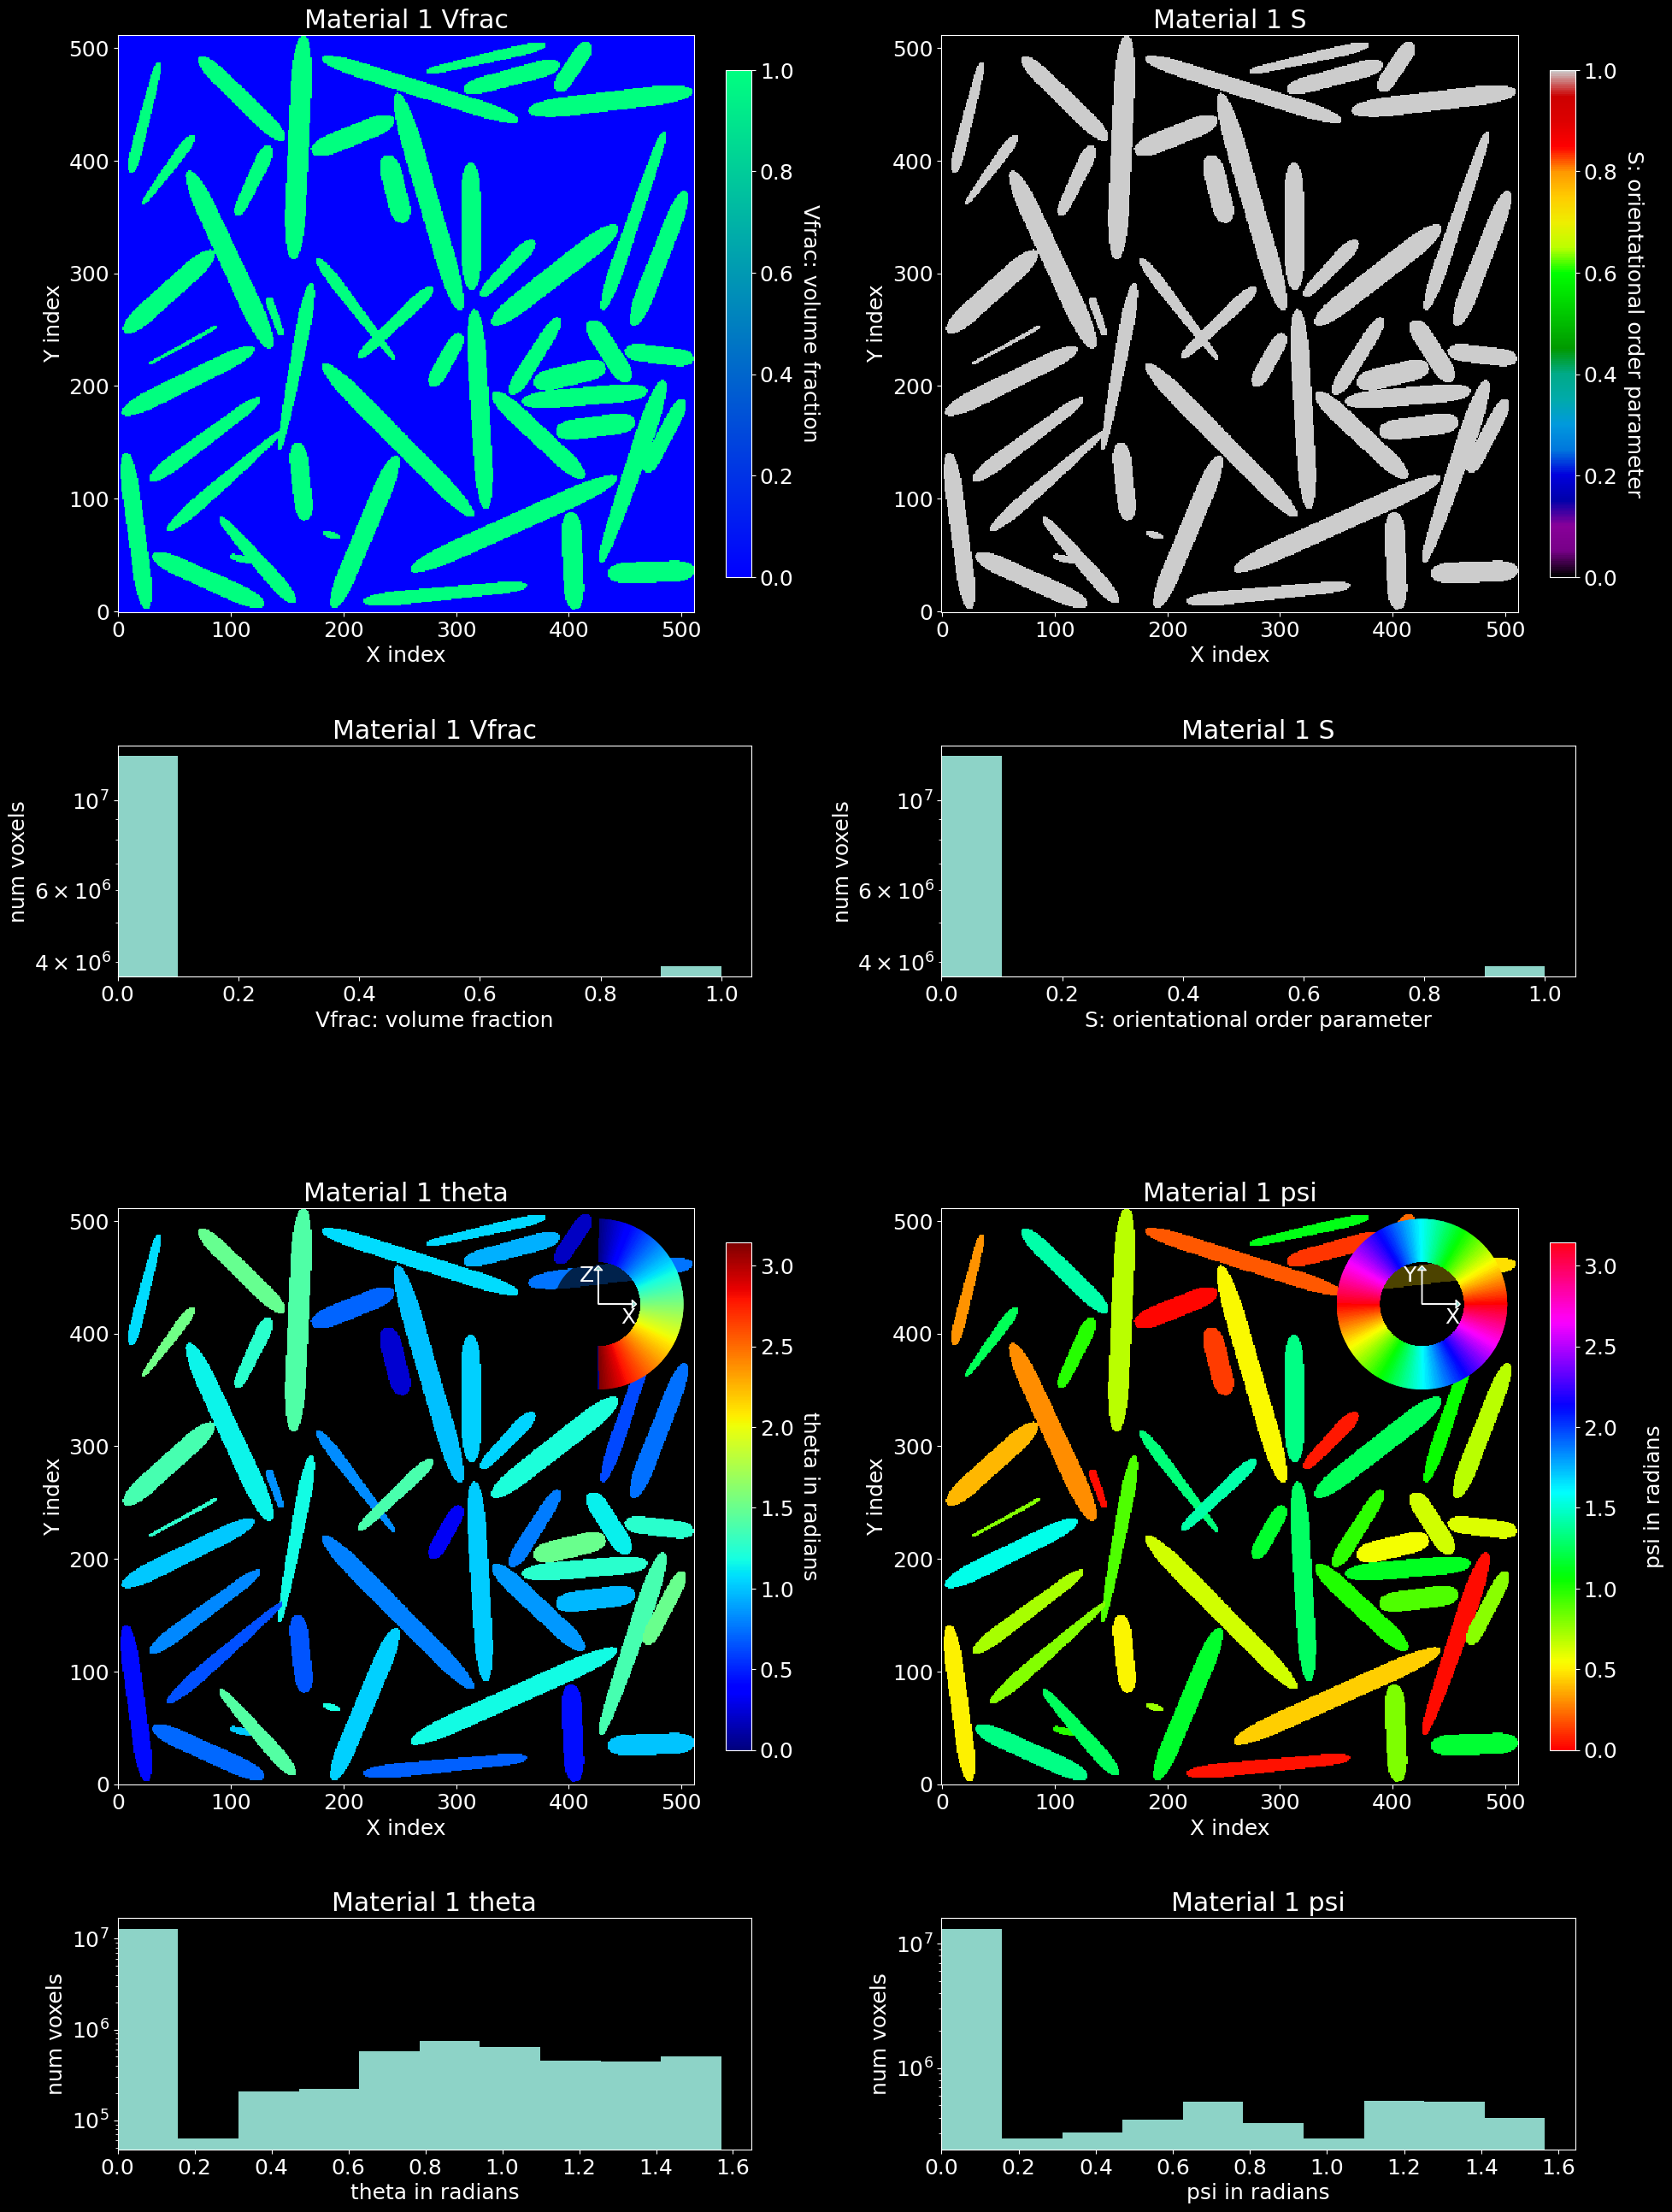

Material 2 Vfrac. Min: 0.0 Max: 1.0
Material 2 S. Min: 0.0 Max: 0.0
Material 2 theta. Min: 0.0 Max: 0.0
Material 2 psi. Min: 0.0 Max: 0.0


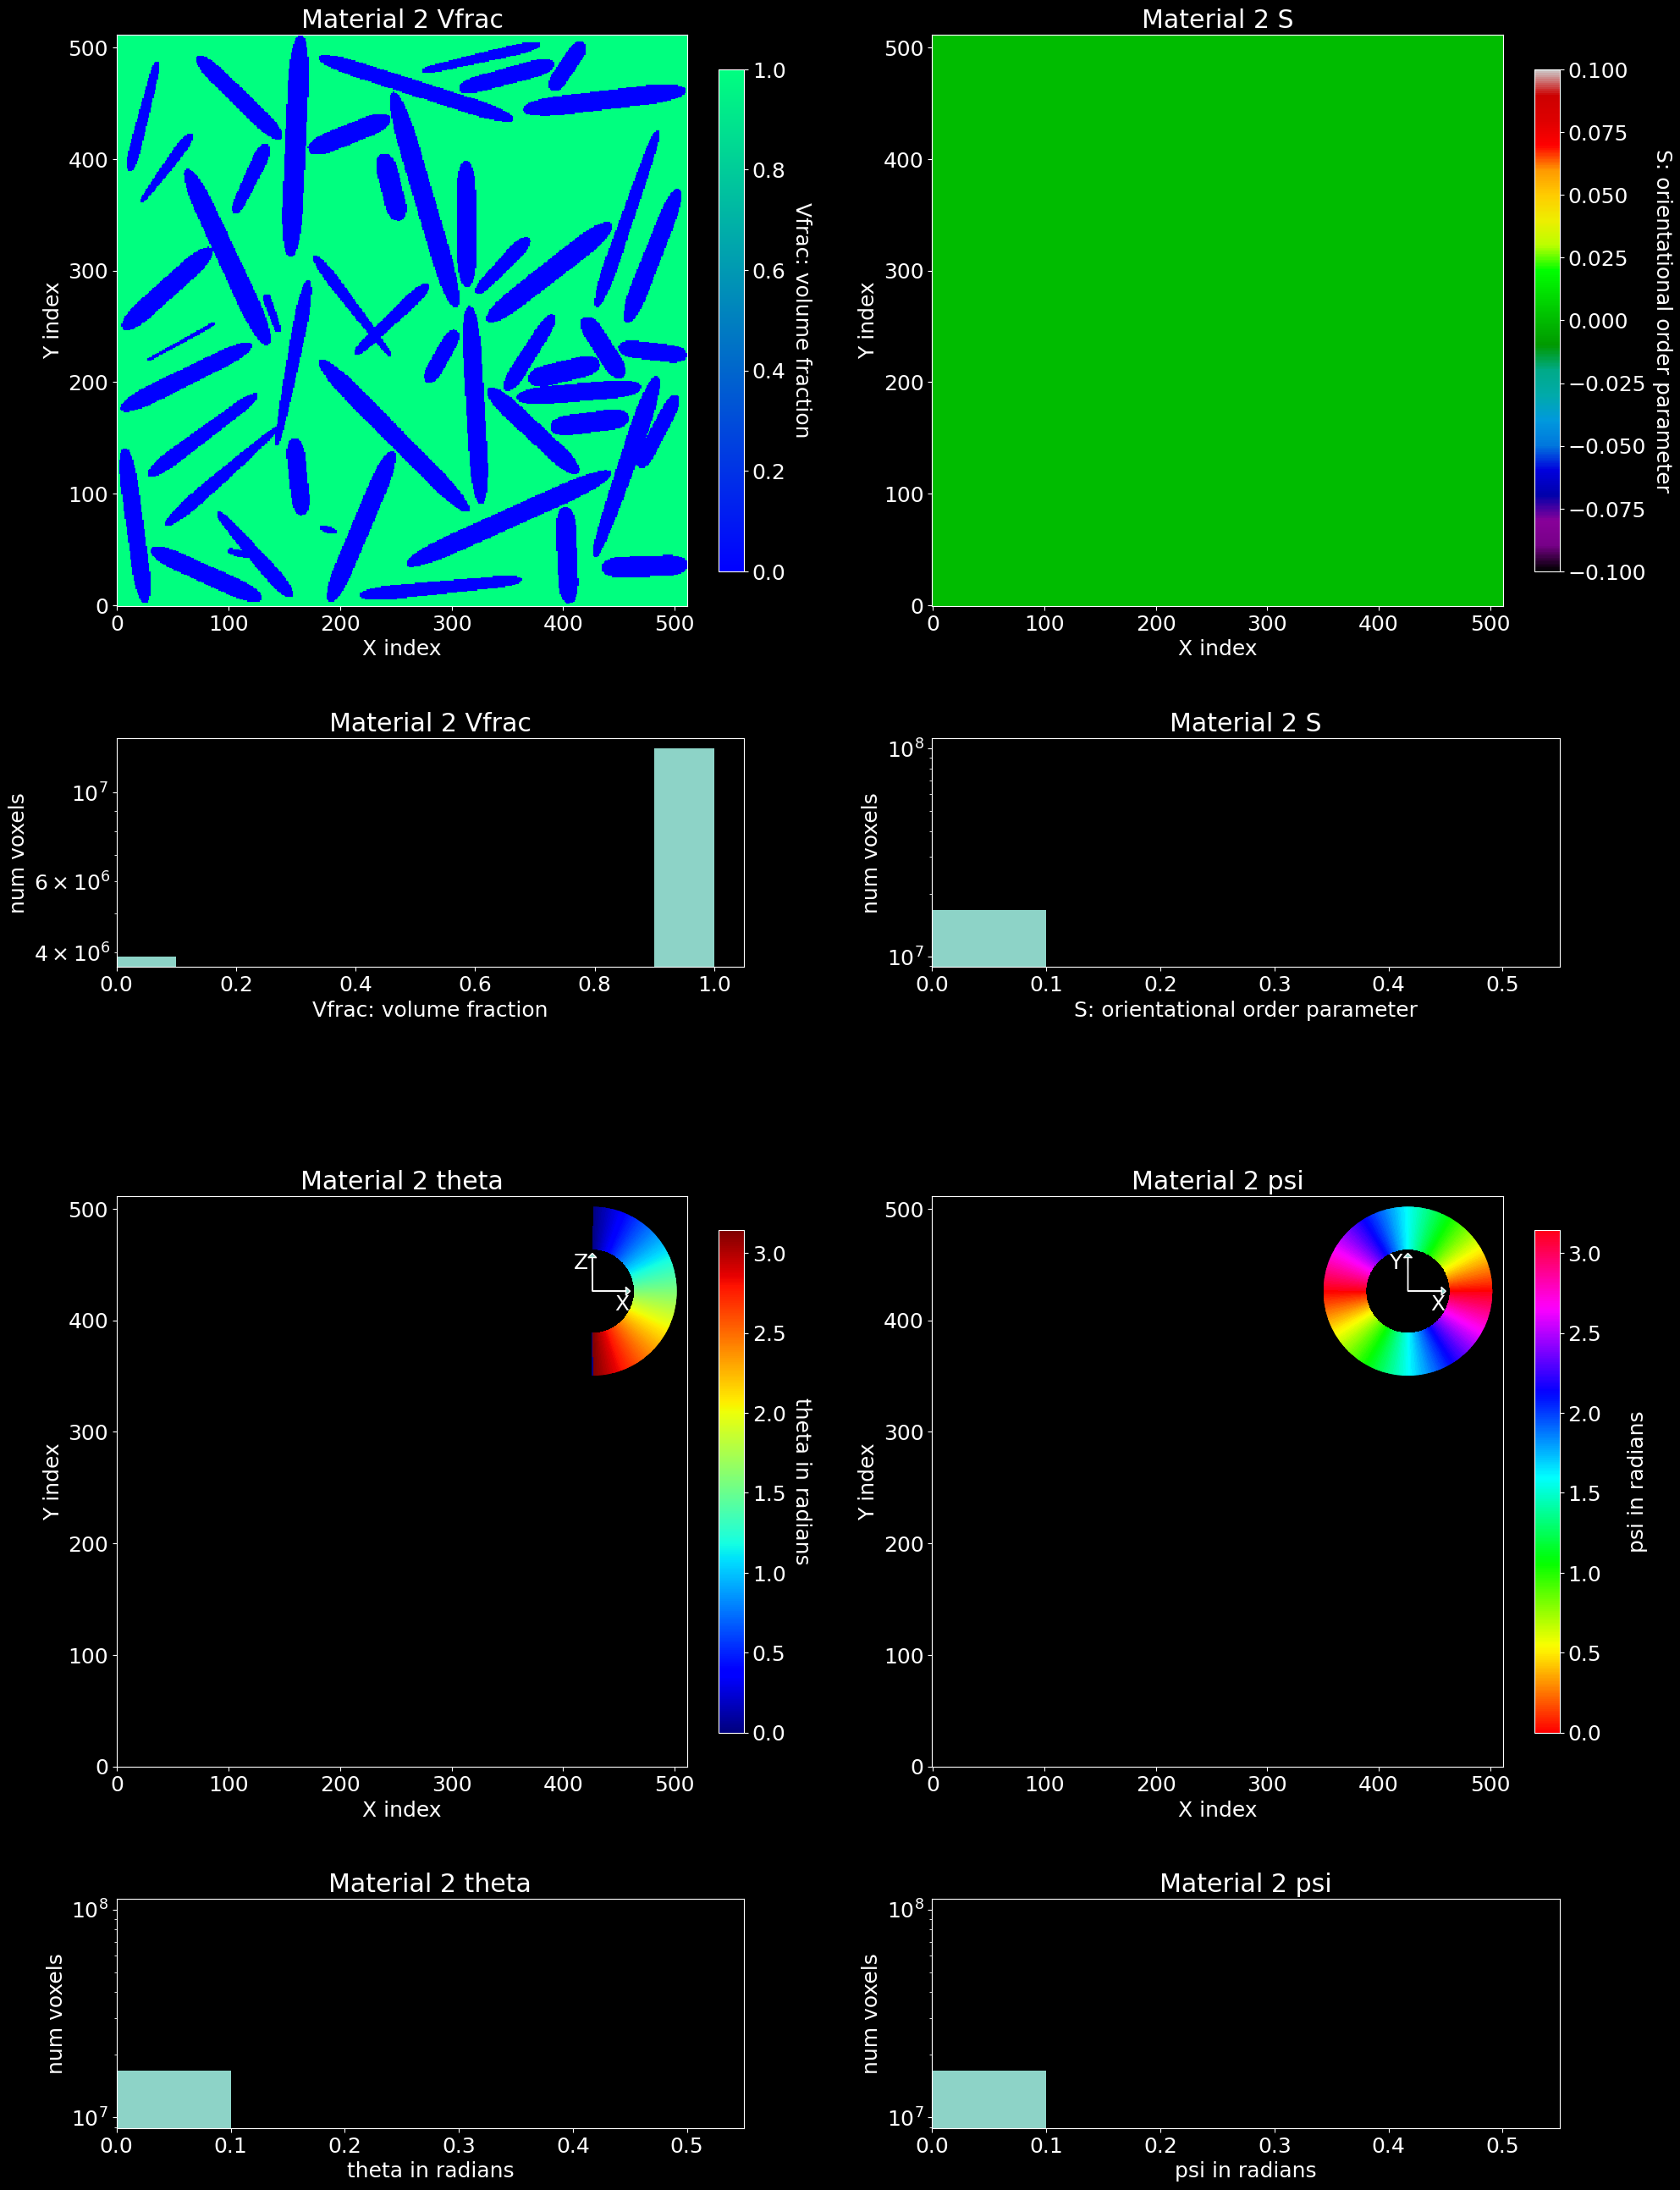

Total Vfrac whole model. Min: 1.0 Max: 1.0
0:00:05.201882


In [47]:
checkH5('Fibril.hdf5', z_slice=40, plotstyle='dark')

In [49]:
import subprocess
subprocess.run(['CyRSoXS','Fibril.hdf5'])

[WARNING] : No value corresponding to HDF5DirName found. Setting to default
[WARNING] : No value corresponding to Algorithm found. Setting to default
[WARNING] : No value corresponding to MaxStreams found. Setting to default
Input Data : [OK] 
NumMaterial          : 2
Dimensions [Z Y X]   : [64 512 512]
PhysSize             : 2 nm 
E Rotation Angle     : 0 : 1 : 360
Morphology Type      : EulerAngles
Morphology Order     : ZYX
Energies simulated   : [270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 ]
Windowing Type       : NONE
Rotation Mask        : 0
Interpolation Type   : Trilinear interpolation
HDF Output Directory : HDF5
Scatter Approach     : Partial
Algorithm            : CommunicationMinimizing
 ________________________________________________________

CompletedProcess(args=['CyRSoXS', 'Fibril.hdf5'], returncode=0)

In [54]:
import h5py
basePath = pathlib.Path('.').absolute()
h5path = pathlib.Path(basePath,'HDF5')
h5list = list(sorted(h5path.glob('*h5')))

In [55]:
def print_key(f, key):
    try:
        keys2 = f[key].keys()
        for key2 in keys2:
            new_key = key + '/' + key2
            print_key(f, new_key)
    except AttributeError:
        print(key)

with h5py.File(h5list[0],'r') as f:
    for key in f.keys():
        print_key(f, key)

K0/projection
KIDList/KVec


In [56]:
from matplotlib import cm
from matplotlib.colors import LogNorm

In [57]:
import sys
sys.path.append('/home/devon/Documents/Github/PyHyperScattering/src/')

In [58]:
from PyHyperScattering.load import cyrsoxsLoader
from PyHyperScattering.integrate import WPIntegrator

In [59]:
load = cyrsoxsLoader()
integ = WPIntegrator(force_np_backend=True) # avoiding gpu backend for this tutorial

In [60]:
raw = load.loadDirectory(basePath)

Finished reading 70 energies. Time required: 0:00:00.064833


In [61]:
remeshed = integ.integrateImageStack(raw)

  0%|          | 0/70 [00:00<?, ?it/s]

In [62]:
c = cm.jet(np.linspace(0,1,len(remeshed)))

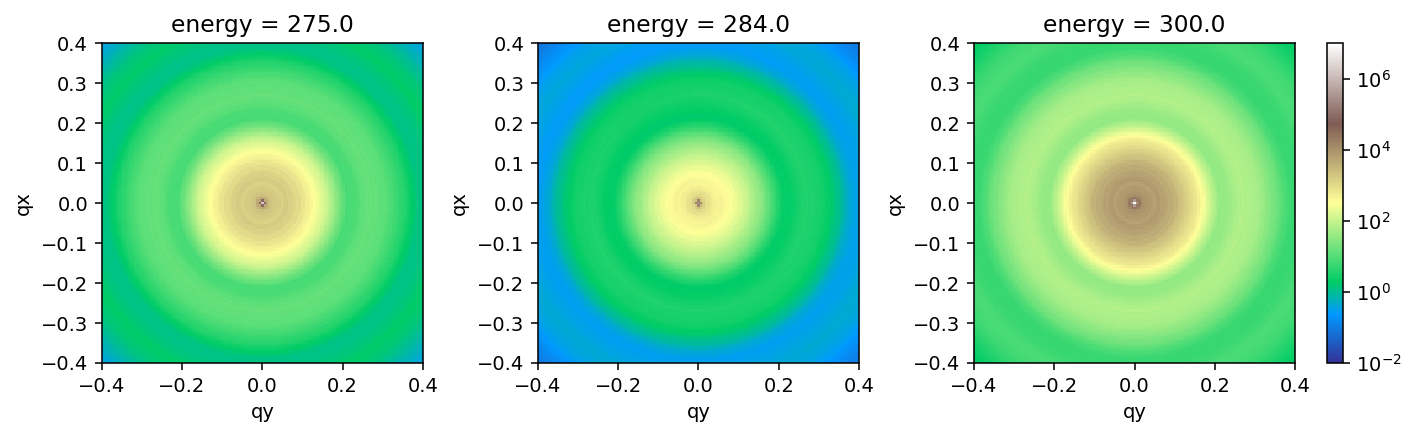

In [63]:
fig, ax = plt.subplots(1,3,figsize=(10,3),dpi=140,constrained_layout=True)
raw.sel(energy=275).plot(norm=LogNorm(1e-2,1e7),cmap='terrain',ax=ax[0],add_colorbar=False)
raw.sel(energy=284).plot(norm=LogNorm(1e-2,1e7),cmap='terrain',ax=ax[1],add_colorbar=False)
raw.sel(energy=300).plot(norm=LogNorm(1e-2,1e7),cmap='terrain',ax=ax[2])

[{axes.set_xlim(-0.4,0.4),axes.set_ylim(-0.4,0.4)} for axes in ax]
plt.show()

In [64]:
# calculate the anisotropy metric
A = remeshed.rsoxs.AR(chi_width=20)

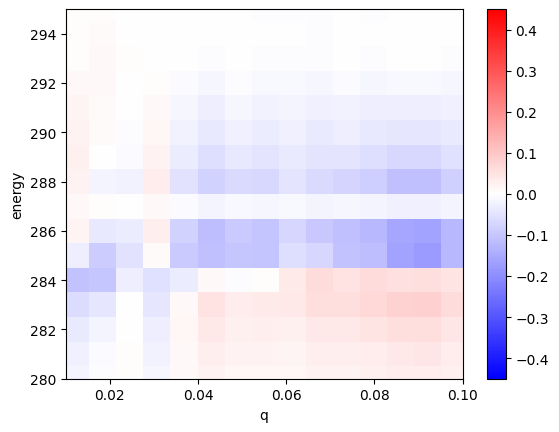

In [73]:
A.plot(x='q',cmap='bwr', vmin=-0.45, vmax=0.45)
plt.xlim(left=0.01, right=0.1)
plt.ylim(bottom=280, top=295)
plt.xscale('linear')
plt.show()

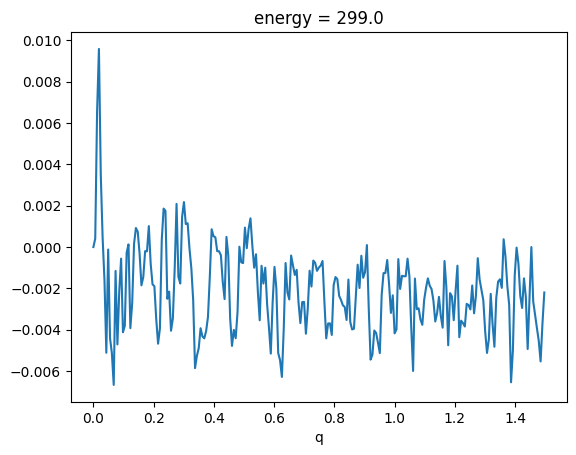

In [66]:
A.sel(energy=299,method='nearest').plot()
plt.show()

In [32]:
horz = remeshed.rsoxs.slice_chi(0, chi_width=20)
vert = remeshed.rsoxs.slice_chi(90, chi_width=20)

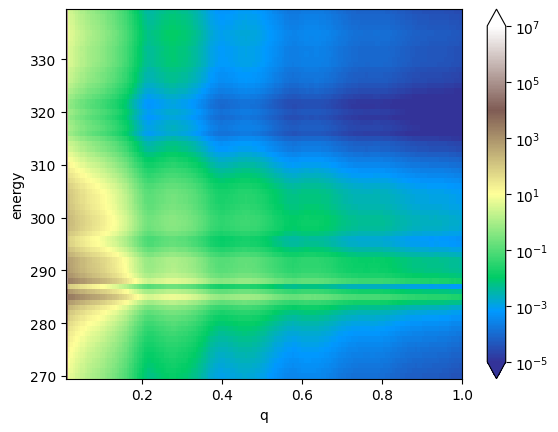

In [33]:
vert.plot(x='q',cmap='terrain',norm=LogNorm(1e-5,1e7), xscale='linear')
plt.xlim(left=0.01, right=1)
plt.show()

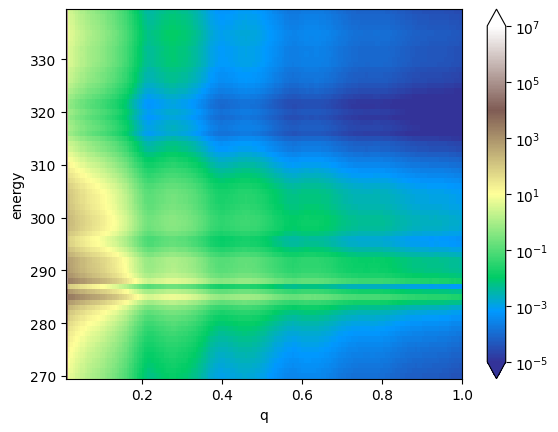

In [34]:
vert.plot(x='q',cmap='terrain',norm=LogNorm(1e-5,1e7), xscale='linear')
plt.xlim(left=0.01, right=1)
plt.show()

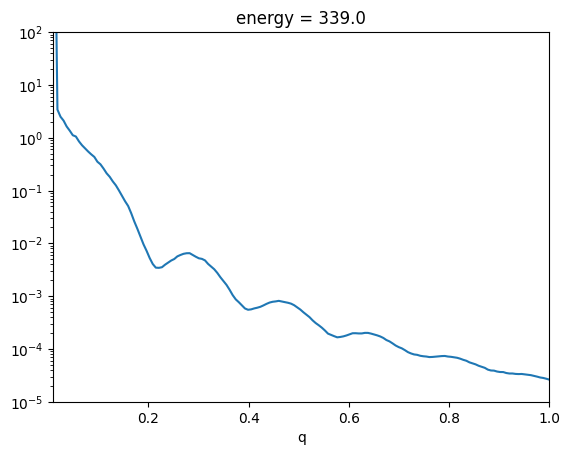

In [35]:
vert.sel(energy=339).plot(yscale='log',xscale='linear')
plt.xlim(left=0.01, right=1)
plt.ylim(bottom=1e-5, top=1e2)
plt.show()

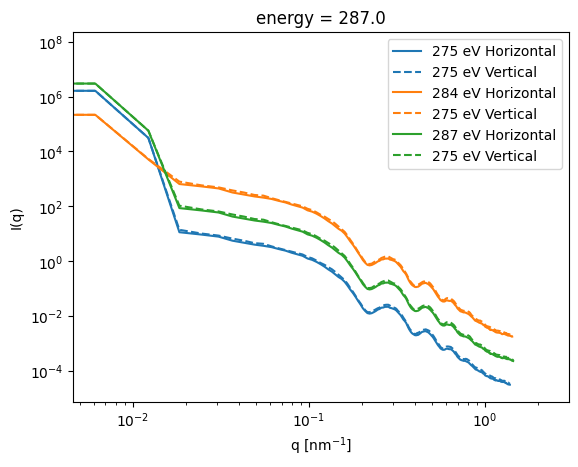

In [36]:
horz.sel(energy=275).plot(xscale='log',yscale='log',label='275 eV Horizontal',color='tab:blue')
vert.sel(energy=275).plot(xscale='log',yscale='log',label='275 eV Vertical',linestyle='--',color='tab:blue')
horz.sel(energy=284,method='nearest').plot(xscale='log',yscale='log',label='284 eV Horizontal',color='tab:orange')
vert.sel(energy=284).plot(xscale='log',yscale='log',label='275 eV Vertical',linestyle='--',color='tab:orange')
horz.sel(energy=287,method='nearest').plot(xscale='log',yscale='log',label='287 eV Horizontal',color='tab:green')
vert.sel(energy=287).plot(xscale='log',yscale='log',label='275 eV Vertical',linestyle='--',color='tab:green')
plt.legend()
plt.xlabel(r'q [nm$^{-1}$]')
plt.ylabel('I(q)')
plt.show()

In [52]:
mat1_orientation_box = np.zeros((morphology.z_dim, morphology.y_dim, morphology.x_dim, 3))
for fibril in morphology.fibrils:
    indices = np.array(fibril.voxel_mesh.vertices, dtype=int)
    for index in indices:
        index = np.flip(index)
        if index[0] < morphology.z_dim and index[1] < morphology.y_dim and index[2] < morphology.x_dim:
            mat1_orientation_box[tuple(index)] = fibril.color

In [53]:
plt.close()
fig = plt.figure(dpi=300)
def updatefig(i):
    fig.clear()
    plt.imshow(mat1_orientation_box[i,:,:,:])
anim = animation.FuncAnimation(fig, updatefig, 64)
anim.save("test.mp4", fps=16)
plt.close()

In [ ]:
scene = morphology.get_scene(show_bounding_box=True)
scene.show()

In [11]:
scene = morphology.get_scene(show_bounding_box=True, show_voxelized=True)
# scene.show()

In [12]:
indices = np.array([[0,0,0]],dtype=int)

fibrils = morphology.fibrils
for fibril in fibrils:
    voxel_mesh = fibril.voxel_mesh
    indices = np.append(indices, np.array(voxel_mesh.vertices, dtype=int),axis=0)

indices  = [index for index in indices if index[0] < morphology.x_dim and index[1] < morphology.y_dim and index[2] < morphology.z_dim]
    
voxel_box = np.zeros((morphology.x_dim, morphology.y_dim, morphology.z_dim))
for index in indices:
    voxel_box[tuple(index)] = 1

In [ ]:
fibril.voxel_mesh.verticesnp.array(voxel_mesh.vertices, dtype=int)

In [ ]:
plt.close()
fig = plt.figure(dpi=300)
def updatefig(i):
    fig.clear()
    plt.imshow(morphology.orientation_box[:,:,i,:])
plt.figure(dpi=150)
plt.imshow(voxel_box[:,:,60])

In [18]:
import matplotlib.animation as animation
fig = plt.figure(dpi=300)
def updatefig(i):
    fig.clear()
    plt.imshow(voxel_box[:,:,i])
    plt.xlabel('x (nm)')
    plt.ylabel('y (nm)')
    plt.draw()
anim = animation.FuncAnimation(fig, updatefig, 64)
anim.save("test.mp4", fps=16)
plt.close()

In [16]:
np.shape(voxel_box)

(512, 512, 64)

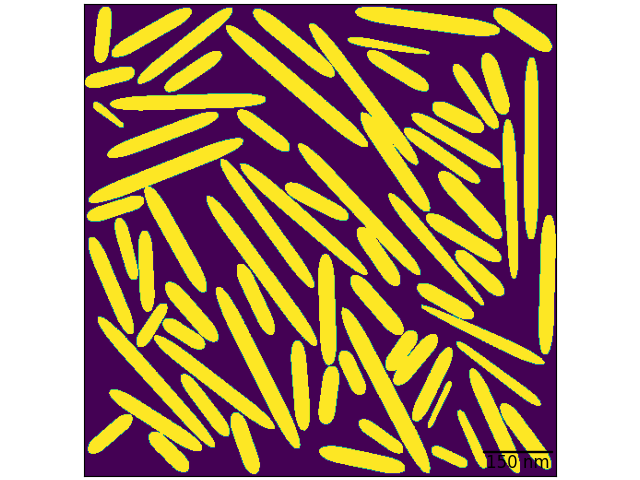

In [21]:
plt.close()
fontprops = fm.FontProperties(size=12)
# voxel_box = np.random.rand(512, 512, 64)
fig, ax = plt.subplots(constrained_layout=True)
ax.imshow(voxel_box[:,:,10])
# ax.set_xlabel('x dim (nm)')
# ax.set_ylabel('y dim (nm)')
ticks  = [0, 100, 200, 300, 400, 500]
ticks2 = np.multiply(ticks,2)
ax.set_xticks([])
# ax.set_xticklabels(ticks2)
ax.set_yticks([])
# ax.set_yticklabels(ticks2)
# calculate the scale bar dimensions
scale_bar_length = 100 # in pixels
scale_bar_height = 10 # in pixels
scale_bar_width = scale_bar_length # in pixels
scale_bar_offset = 20

# calculate the position of the scale bar
x_pos = 512 - (scale_bar_length + scale_bar_offset) # in axes coordinates
y_pos = 512 - (scale_bar_offset + scale_bar_height) # in axes coordinates

# create the scale bar rectangle and add it to the plot
# scale_bar_rect = patches.Rectangle((x_pos, y_pos), scale_bar_length, scale_bar_height, linewidth=2, edgecolor='white', facecolor='black')
# ax.add_patch(scale_bar_rect)

# add the scale bar label
# scale_bar_label = str(scale_bar_width) + ' nm'
# ax.text(x_pos, y_pos, scale_bar_label, color='white', fontsize=12)
scalebar = AnchoredSizeBar(ax.transData,
                           75, '150 nm', 'lower right', 
                           pad=0.1,
                           color='k',
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fontprops)
ax.add_artist(scalebar)
plt.show()

In [ ]:
for i in range(100):
    plt.close()

In [ ]:
orientation = np.random.random(3)
orientation /= np.linalg.norm(orientation)
orientation

In [ ]:
np.linalg.norm(orientation)

In [ ]:
fibril_volume = 0
fibril_vox_volume = 0
for fibril in morphology.fibrils:
    fibril_volume     += fibril.volume
    fibril_vox_volume += fibril.voxel_volume
print(f'Fibril Volume    : {fibril_volume:.2f}')
print(f'Fibril Vox Volume: {fibril_vox_volume:.2f}')
print(f'Box Volume: {morphology.box_volume}')
mpc = fibril_volume / morphology.box_volume * 100
vpc = fibril_vox_volume / morphology.box_volume * 100
print(f'Mesh Percent Crystallinity: {mpc:.2f}')
print(f'Voxel Percent Crystallinity: {vpc:.2f}')

- Animation for morphology
- List of model parameters

In [ ]:
ma = morphology.mesh_list[0]
va = ma.voxelized(pitch=pitch)

mb = morphology.mesh_list[1]
vb = mb.voxelized(pitch=pitch)

In [ ]:
vmesh_list = []
for mesh in tqdm(morphology.mesh_list):
    v = mesh.voxelized(pitch=1)
    vmesh = v.fill().as_boxes()
    vmesh_list.append(vmesh)

vscene = trimesh.Scene(vmesh_list)
vscene.show()

In [ ]:
vscene = trimesh.Scene(vmesh_list)
vscene.show()

In [ ]:
indices = np.array([[0,0,0]],dtype=int)
for vmesh in vmesh_list:
    indices = np.append(indices, np.array(vmesh.vertices, dtype=int),axis=0)
# np.shape(indices)
indices  = [index for index in indices if index[0] < morphology.x_dim and index[1] < morphology.y_dim and index[2] < morphology.z_dim]
    
voxel_box = np.zeros((morphology.x_dim, morphology.y_dim, morphology.z_dim))
for index in indices:
    voxel_box[tuple(index)] = 1

In [ ]:
vmesh_list[0].vertices

In [ ]:
np.any(vmesh_list[0].vertices > 500)

In [ ]:
plt.figure(dpi=150)
plt.imshow(voxel_box[:,:,7])
# np.where(voxel_box == 1)

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxel_box)
ax.set_aspect('equal')
plt.show()

In [ ]:
# print(vmesh_list)
# vmesh_list.append(morphology.bounding_path)
vscene = trimesh.Scene(vmesh_list)
vscene.show()

In [ ]:
plt.imshow(v.matrix[:,10])
plt.show()

In [ ]:
v.translation

In [ ]:
vmesh_list.pop()

### What's next?
###### - Get the angles sorted
###### - Functionality to check average angle
###### - Check degree of crystallinity
###### - Voxelize mesh
###### - Angles 

In [ ]:
full_cyl_vox = full_cyl_mesh.voxelized(pitch=2)
full_cyl_vox.fill()
full_cyl_vox_mesh  = full_cyl_vox.as_boxes()
print(full_cyl_vox.volume)
print(full_cyl_mesh.volume)

In [ ]:
full_cyl_vox_mesh.show()

In [ ]:
broken = trimesh.repair.broken_faces(full_cyl_vox_mesh, color=[255, 0, 0, 255])
print(len(broken))
print(full_cyl_vox_mesh.is_watertight)
full_cyl_vox_mesh.show(smooth=False)

In [ ]:
core_cyl_vox = core_cyl_mesh.voxelized(pitch=2)
core_cyl_vox.fill()
core_cyl_vox_mesh  = core_cyl_vox.as_boxes()
print(core_cyl_vox.volume)
print(core_cyl_mesh.volume)

In [ ]:
shell_cyl_vox = shell_cyl_mesh.voxelized(pitch=2)
shell_cyl_vox.fill()
shell_cyl_vox_mesh = shell_cyl_vox.as_boxes()
print(shell_cyl_vox.volume)
print(shell_cyl_mesh.volume)

In [ ]:
within_mesh(full_cyl_vox_mesh, core_cyl_vox_mesh)

In [ ]:
shell_cyl_mesh.is_watertight

In [ ]:
v1_mesh.visual.face_colors[:] = [255, 0, 0, 0]
trans_matrix = trimesh.transformations.translation_matrix([64, 0, 0])
v2_mesh.apply_transform(trans_matrix)
voxel_scene = trimesh.Scene([v3_mesh, m3])
voxel_scene.show()

In [ ]:
v

In [ ]:
radius = 10
height = 40
pitch  = 0.2
mesh = trimesh.primitives.Cylinder(radius=radius, height=height, use_embree=True)
mesh_vol = mesh.volume
print(f'Mesh Volume: {mesh_vol:.2f}')

voxel_grid = mesh.voxelized(pitch=pitch)
voxel_mesh = voxel_grid.fill().as_boxes()
voxel_mesh_vol = voxel_mesh.volume
print(f'Voxel Mesh Volume: {voxel_mesh_vol:.2f}')

vol_diff = np.abs(voxel_mesh_vol - mesh_vol)/mesh_vol * 100
print(f'Volume Difference: {vol_diff:.2f}%')

In [ ]:
import numpy as np

In [ ]:
mu, sigma = 0, 1.0
samples   = 100000
gnoise = np.random.normal(mu, sigma, samples)
enoise = np.random.uniform(0.0, np.pi, samples)
abs(mu - np.mean(gnoise))

theta = (90 + gnoise)/180 * np.pi
phi    = enoise

In [ ]:
vec2 = np.sin(theta)*np.cos(phi)
vec1 = np.sin(theta)*np.sin(phi)
vec0 = np.cos(theta)
plt.figure()
count, bins, ignored = plt.hist(vec2, 30, density=True)
plt.title('vec2')
plt.figure()
count, bins, ignored = plt.hist(vec1, 30, density=True)
plt.title('vec1')
plt.figure()
count, bins, ignored = plt.hist(vec0, 30, density=True)
plt.title('vec0')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def midpoints(x):
    sl = ()
    for _ in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]
    return x

# prepare some coordinates, and attach rgb values to each
r, g, b = np.indices((17, 17, 17)) / 16.0
rc = midpoints(r)
gc = midpoints(g)
bc = midpoints(b)

# define a sphere about [0.5, 0.5, 0.5]
sphere = (rc - 0.5)**2 + (gc - 0.5)**2 + (bc - 0.5)**2 < 0.5**2

# combine the color components
colors = np.zeros(sphere.shape + (3,))
colors[..., 0] = rc
colors[..., 1] = gc
colors[..., 2] = bc

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(r, g, b, sphere,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)
ax.set(xlabel='r', ylabel='g', zlabel='b')
ax.set_aspect('equal')

# plt.show()